Compute the Sun’s declination for the equinoxes and solstices using only trigonometric functions from the math module in an explicit for loop. Print the results and check if they agree with the values computed with NumPy in this section. This exercise will help you understand what is behind an implicit loop.

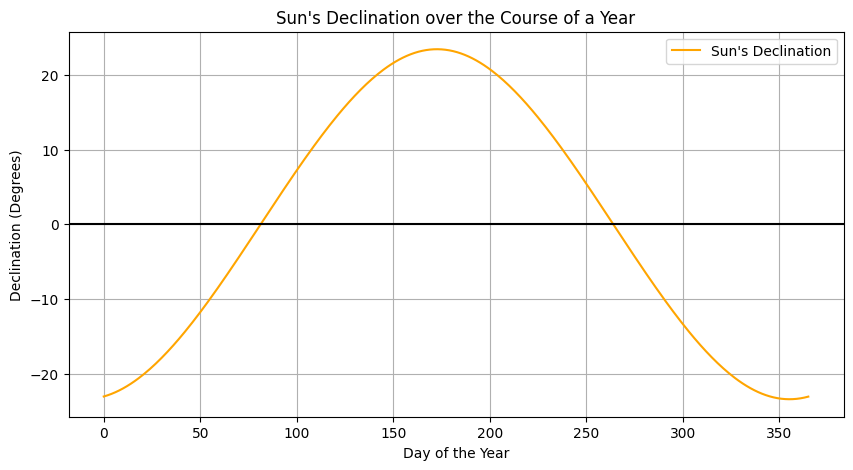

In [1]:
import math
import matplotlib.pyplot as plt

epsilon = math.radians(23.44)  # Earth's axial tilt
omega = math.radians(360 / 365.24)  # Angular velocity of Earth's orbit

# Function to calculate the Sun's declination
def declination(N):
    return -math.degrees(math.asin(math.sin(epsilon) * math.cos(omega * (N + 10))))

days = range(0, 366)
declinations = [declination(N) for N in days]

plt.figure(figsize=(10, 5))
plt.plot(days, declinations, label="Sun's Declination", color='orange')
plt.xlabel("Day of the Year")
plt.ylabel("Declination (Degrees)")
plt.grid(True)
plt.axhline(0, color='black')
plt.title("Sun's Declination over the Course of a Year")
plt.legend()
plt.show()

The day count N in Eq. (2.1) can be calculated for a given date with the help of the module datetime. For example, the day of the vernal equinox in the year 2020 is given by:

`vernal_equinox = datetime.date(2020, 3, 20) - datetime.date(2020, 1, 1)`

Then `vernal_equinox.days` evaluates to 79. Define the array N (equinoxes and solstices) using datetime.

In [2]:
import datetime

year = 2020

vernal_equinox = datetime.date(year, 3, 20)
summer_solstice = datetime.date(year, 6, 20)
autumnal_equinox = datetime.date(year, 9, 22)
winter_solstice = datetime.date(year, 12, 21)

day = datetime.date(year, 1, 1)
N_vernal_equinox = (vernal_equinox - day).days
N_summer_solstice = (summer_solstice - day).days
N_autumnal_equinox = (autumnal_equinox - day).days
N_winter_solstice = (winter_solstice - day).days

N = [N_vernal_equinox, N_summer_solstice, N_autumnal_equinox, N_winter_solstice]

print("N (day counts for equinoxes and solstices):", N)

N (day counts for equinoxes and solstices): [79, 171, 265, 355]


A more accurate formula for the declination of the Sun takes the eccentricity
e = 0.0167 of Earth’s orbit into account:

`δ = - arcsin ( sin(ε₀) * cos(360°/365.24 * (N + 10)) + e * 360°/π * sin(360°/365.24 * (N - 2)) )`

Compute the declination assuming a circular orbit (Eq. 2.1), the declination resulting
from the above formula, the difference between these values, and the relative
deviation of the circular approximation in % for equinoxes and solstices, and list
your results in a table. Make sure that an adequate number of digits is displayed to
compare the formulas.


In [27]:
import math
import matplotlib.pyplot as plt
import pandas as pd

epsilon = math.radians(23.44)  # Earth's axial tilt
omega = math.radians(360 / 365.24)  # Angular velocity of Earth's orbit
theta = math.radians(360 / math.pi)
e = 0.0167  # Eccentricity of Earth's orbit

days_events = {"Vernal Equinox": 79, "Summer solstice": 171, "Autumnal Equinox": 265, "Winter Solstice":355}

# Function to calculate the Sun's declination
def declination(N):
    return -math.degrees(math.asin(math.sin(epsilon) * math.cos(omega * (N + 10))))

def declination_e(N):
    return -math.degrees(math.asin(math.sin(epsilon) * math.cos(omega * (N + 10)) + e * theta * math.sin(omega * (N-2))))

days = range(0, 366)
declinations = [declination(N) for N in days]
declinations_e = [declination_e(N) for N in days] 

results = []

for event, N in days_events.items():
    delta = declination(N)
    delta_e = declination_e(N)
    difference = delta - delta_e
    relative_deviation = (difference / delta) * 100
    results.append([event, delta, delta_e, difference, relative_deviation])

columns = ["Event", "Declination (Circular) [°]", "Declination (Eccentric) [°]", "Difference [°]", "Relative Deviation [%]"]
df = pd.DataFrame(results, columns=columns)
df

# Visualization
# plt.figure(figsize=(10, 5))
# plt.plot(days, declinations, label="Sun's Declination", color='orange')
# plt.plot(days, declinations_e, label="Sun's Declination with e", color='red')
# plt.xlabel("Day of the Year")
# plt.ylabel("Declination (Degrees)")
# plt.grid(True)
# plt.axhline(0, color='black')
# plt.title("Sun's Declination over the Course of a Year")
# plt.legend()
# plt.show()

,Event,Declination (Circular) [°],Declination (Eccentric) [°],Difference [°],Relative Deviation [%]
0,Vernal Equinox,-0.905508,-2.762526,1.857018,-205.080314
1,Summer solstice,23.430354,22.947015,0.483339,2.062875
2,Autumnal Equinox,-0.419507,1.460605,-1.880112,448.171464
3,Winter Solstice,-23.439788,-23.004545,-0.435243,1.856855


The highest altitude amax (also known as upper culmination) of a star measured from the horizontal plane of an observer on Earth is given by
`amax =
90 - φ + δ if φ ≥ δ,
90 + φ - δ if φ ≤ δ, (2.3)` where φ is the latitude of the observer and δ the declination of the star. Calculate amax at your current location for the following stars: Polaris (δ = +89° 15' 51"), Betelgeuse (δ = +07° 24' 25"), Rigel (δ = −08° 12' 15"), and Sirius A (δ = −16° 42' 58"). To distinguish the two cases in Eq. (2.3), use the where() function from numpy. For example, the expression np.where(phi <= delta, phi - delta, phi + delta) compares phi and delta element by element and returns an array with elements of phi - delta where the condition phi <= delta is true and elements of phi + delta where it is false. Print the results with the appropriate number of significant digits together with the declinations.


In [45]:
import numpy as np

# Observer's latitude in degrees
phi = 33.7

# Declinations of the stars in degrees
Polaris = 89 + 15/60 + 51/3600
Betelgeuse =  7 + 24/60 + 25/3600
Rigel = - (8 + 12/60 + 15/3600)
Sirius =  - (16 + 42/60 + 58/3600)

declinations = [Polaris, Betelgeuse, Rigel, Sirius]
deltas = np.array(declinations)

a_max = np.where(phi >= deltas, 90 - phi + deltas, 90 + phi - deltas)

for star, delta, altitude in zip(['Polaris', 'Betelgeuse', 'Rigel', 'Sirius'], deltas, a_max):
    print(f'{star}: Declination = {delta:.4f}°, Highest Altitude (amax) = {altitude:.4f}°')

Polaris: Declination = 89.2642°, Highest Altitude (amax) = 34.4358°
Betelgeuse: Declination = 7.4069°, Highest Altitude (amax) = 63.7069°
Rigel: Declination = -8.2042°, Highest Altitude (amax) = 48.0958°
Sirius: Declination = -16.7161°, Highest Altitude (amax) = 39.5839°


A sidereal day is about `3 min 56 s` shorter than a solar day (24 h). Show that this implies `1h ≈ 0.9973 h`. How would you need to modify the definition of T in Sect. 2.1.2 to make use of this factor without utilizing Astropy units.

In [53]:
import math

solar_day = 24
sidereal_difference = (3 / 60 + 56 / 3600)
sidereal_day_hours = solar_day - sidereal_difference
solar_to_sidereal = sidereal_day_hours / solar_day

#Adjusting Solar day to Sidereal day without using astropy.units
T_solar = 5 #Example Solar Hours
T_sidereal = solar_to_sidereal * T_solar
print(f"Sidereal time: {T_sidereal} hours")

Sidereal time: 4.986342592592592 hours


Compute and plot the annual variation of the day length at your geographical location using both the formula with eccentricity correction from Exercise 2.3 and `get_sun()` from `SkyCoord`. How large is the deviation? How does your result compare with other places shown in Fig. 2.5?

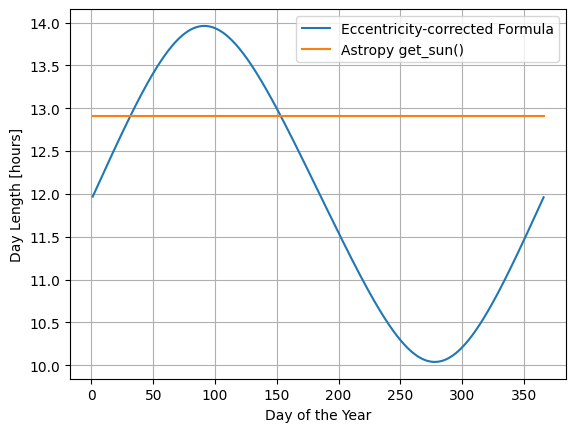

Maximum deviation: 2.8689 hours


In [110]:
import astropy.units as u
from astropy.coordinates import EarthLocation, get_sun
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt

# Observer's location
obs = EarthLocation(lat = 30*u.deg + 21*u.arcmin + 46*u.arcsec, lon = 68*u.deg + 59*u.arcmin + 48*u.arcsec)
phi = obs.lat.to(u.rad).value  # Convert latitude to radians

epsilon = np.radians(23.44)  # Earth's axial tilt
omega = 2 * np.pi / 365.24  # Angular velocity of Earth's orbit
e = 0.0167  # Eccentricity of Earth's orbit

# Eccentricity formula
T = []
days = np.arange(1, 367)  # Days of the year (1 to 366)

for N in days:
    M = omega * (N - 2)  # Mean anomaly
    L = M + 2 * e * np.sin(M)  # True anomaly
    delta = np.arcsin(np.sin(epsilon) * np.sin(L))  # Sun's declination
    h = np.arccos(-np.tan(delta) * np.tan(phi))  # Hour angle at sunset
    day_length = (2 * h * 24) / (2 * np.pi)  # Convert radian to hours
    T.append(day_length)


# SkyCoord's get_sun()
T_sun = []
for N in days:
    date = Time("2024-08-23 2:20:00")
    sun = get_sun(date)
    delta_sun = sun.dec.to(u.rad).value
    h_sun = np.arccos(-np.tan(delta_sun) * np.tan(phi))
    day_length_sun = (2 * h_sun * 24) / (2 * np.pi)
    T_sun.append(day_length_sun)

    
plt.plot(days, T, label='Eccentricity-corrected Formula')
plt.plot(days, T_sun, label='Astropy get_sun()')
plt.xlabel("Day of the Year")
plt.ylabel("Day Length [hours]")
plt.legend()
plt.grid(True)
plt.show()

# Deviation
deviation = np.array(T) - np.array(T_sun)
max_deviation = np.max(np.abs(deviation))
print(f"Maximum deviation: {max_deviation:.4f} hours")


Determine the observation window for Betelgeuse at New Year’s Eve. Begin with the location of Hamburg Observatory (see Sect. 2.1.3). How many hours is the star observable during astronomical night, i.e. when the Sun is at least 18◦ below the horizon? Change to your location and compute the altitudes of Polaris, Betelgeuse, and Sirius A for the upcoming night. Produce plots similar to Fig. 2.4. Provided the sky is clear, which stars would you be able to see?

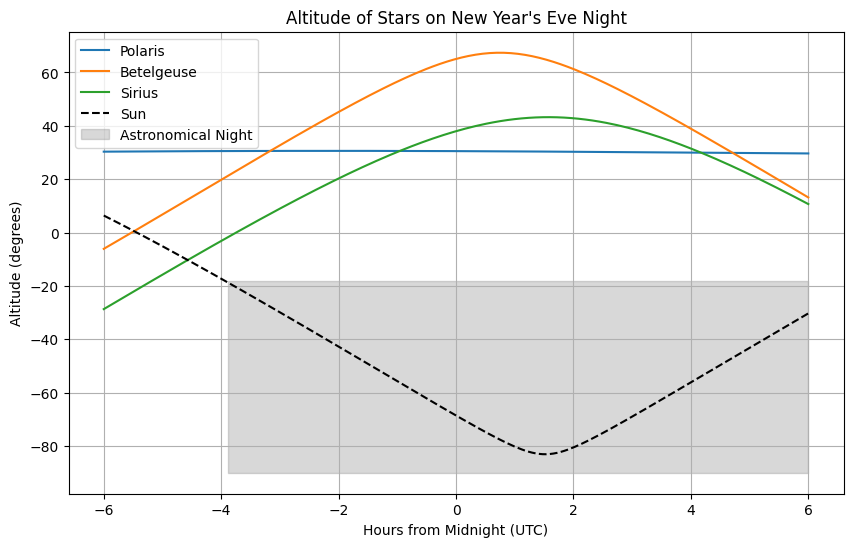

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation, AltAz, get_sun, SkyCoord
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris

# Observer's location
obs_location = EarthLocation(lat=30, lon=68)
time = Time("2023-12-31 18:00:00")  # Start time (New Year's Eve)
delta_hours = np.linspace(-6, 6, 200)  # +/- 6 hours around midnight
times = time + delta_hours * u.hour

# Altitude
frame = AltAz(obstime=times, location=obs_location)

stars = {
    'Polaris': SkyCoord(ra="02h31m49.09s", dec="89d15m51.4s"),
    'Betelgeuse': SkyCoord(ra="05h55m10.3s", dec="07d24m25s"),
    'Sirius': SkyCoord(ra="06h45m08.9s", dec="-16d42m58s"),
}

altitudes = {}
for star, coord in stars.items():
    altitudes[star] = coord.transform_to(frame).alt.deg

plt.figure(figsize=(10, 6))
for star, alt in altitudes.items():
    plt.plot(delta_hours, alt, label=star)

# Astronomical night
sun_alt = get_sun(times).transform_to(frame).alt.deg

plt.plot(delta_hours, sun_alt, 'k--', label='Sun')
plt.fill_between(delta_hours, -18, -90, where=(sun_alt <= -18), color='gray', alpha=0.3, label='Astronomical Night')
plt.xlabel('Hours from Midnight (UTC)')
plt.ylabel('Altitude (degrees)')
plt.title('Altitude of Stars on New Year\'s Eve Night')
plt.legend()
plt.grid(True)
plt.show()